In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fires-data-set/forestfires.csv


# **Forest Fire Prediction**


**Importing Libraries**

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from scipy import stats
from sklearn import svm



**Importing data**

In [116]:
DATA = pd.read_csv('../input/forest-fires-data-set/forestfires.csv')

In [117]:
DATA

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [118]:
DATA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Preprocessing + Scaling**

In [119]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [209]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    
    df = ordinal_encode(df,column='month',ordering=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec' ])
    df = ordinal_encode(df,column='day',ordering=['sun','mon','tue','wed','thu','fri','sat'])
    
    # Splitting dataframe df into X and Y
    if task == 'regression':
        Y = df['area']
    elif task == 'classification':
        Y = df['area'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.99, shuffle=True, random_state=1)
    
    # Scaling feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, Y_train, Y_test
    
    

# Regression

In [121]:
#Allocating preprocessed inputs to Test-Train
X_train, X_test, Y_train, Y_test = preprocess_inputs(data, task='regression')

In [122]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.007476,-0.242510,0.671807,0.948693,0.319014,0.111653,0.486949,0.707061,0.014791,-0.623056,0.999394,-0.072409
1,0.575580,1.388052,-0.203942,-0.914062,0.643711,-0.754250,-0.417666,0.443284,0.701891,-0.499891,-0.508550,-0.072409
2,1.439372,1.388052,-0.641816,0.017315,0.102549,0.577309,-0.681696,0.816968,0.117856,-0.068813,0.496746,-0.072409
3,0.575580,0.572771,0.671807,1.414382,-0.637039,2.812148,1.260955,-1.095413,-0.328759,1.409167,0.496746,-0.072409
4,1.439372,1.388052,0.233933,1.414382,-0.222148,2.225016,0.890429,0.157526,-0.809730,1.778662,-0.731949,-0.072409
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-1.152004,0.572771,1.109682,-1.379751,0.355091,-1.000316,0.582594,-0.040306,-0.603600,-0.561473,-1.737244,-0.072409
507,-1.152004,0.572771,0.233933,0.017315,0.878214,-0.168675,-0.134748,0.926875,0.839311,-0.746221,0.775995,-0.072409
508,0.143684,-0.242510,-1.955439,0.948693,0.192743,-1.205890,-1.886107,0.003656,-0.569244,-1.177299,1.278643,-0.072409
509,1.439372,1.388052,0.233933,-1.379751,0.138626,0.493211,0.219302,0.355359,0.117856,-0.191978,0.999394,-0.072409


In [123]:
Y_train

159      1.69
47       0.00
298      0.00
406      3.95
437      0.00
        ...  
129      0.00
144      0.77
72       0.00
235    196.48
37       0.00
Name: area, Length: 511, dtype: float64

In [133]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

print("Linear Regression R^2: {:.5f}".format(lin_reg_model.score(X_test, Y_test)))

Linear Regression R^2: -0.05644


In [216]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16, 16),solver='lbfgs', max_iter=10000)
nn_reg_model.fit(X_train, Y_train)

print("Neural Network Regression R^2: {:.5f}".format(nn_reg_model.score(X_test, Y_test)))
# Plot


Neural Network Regression R^2: -2.78170


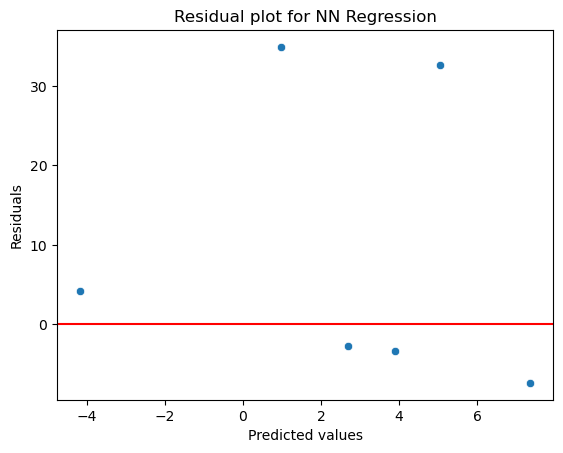

In [141]:
#Tried plotting for neural network regression (open to suggestions)
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = nn_reg_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot predicted values against residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot for NN Regression')
plt.show()


# Classification 

In [142]:
X_train, X_test, Y_train, Y_test = preprocess_inputs(data, task='classification')

In [143]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.007476,-0.242510,0.671807,0.948693,0.319014,0.111653,0.486949,0.707061,0.014791,-0.623056,0.999394,-0.072409
1,0.575580,1.388052,-0.203942,-0.914062,0.643711,-0.754250,-0.417666,0.443284,0.701891,-0.499891,-0.508550,-0.072409
2,1.439372,1.388052,-0.641816,0.017315,0.102549,0.577309,-0.681696,0.816968,0.117856,-0.068813,0.496746,-0.072409
3,0.575580,0.572771,0.671807,1.414382,-0.637039,2.812148,1.260955,-1.095413,-0.328759,1.409167,0.496746,-0.072409
4,1.439372,1.388052,0.233933,1.414382,-0.222148,2.225016,0.890429,0.157526,-0.809730,1.778662,-0.731949,-0.072409
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-1.152004,0.572771,1.109682,-1.379751,0.355091,-1.000316,0.582594,-0.040306,-0.603600,-0.561473,-1.737244,-0.072409
507,-1.152004,0.572771,0.233933,0.017315,0.878214,-0.168675,-0.134748,0.926875,0.839311,-0.746221,0.775995,-0.072409
508,0.143684,-0.242510,-1.955439,0.948693,0.192743,-1.205890,-1.886107,0.003656,-0.569244,-1.177299,1.278643,-0.072409
509,1.439372,1.388052,0.233933,-1.379751,0.138626,0.493211,0.219302,0.355359,0.117856,-0.191978,0.999394,-0.072409


In [145]:
Y_train

159    1
47     0
298    0
406    1
437    0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 511, dtype: int64

**Linear Classification**

In [158]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, Y_train)

print("Linear Classification Accuracy: {:.4f}%".format(lin_clf_model.score(X_test, Y_test) * 100))

Linear Classification Accuracy: 33.3333%


**Neural Network Classification**

In [215]:
nn_clf_model = MLPClassifier(hidden_layer_sizes=(16, 16), solver='lbfgs', max_iter=1000)
nn_clf_model.fit(X_train, Y_train)

print("Neural Network Classification Accuracy: {:.4f}%".format(nn_clf_model.score(X_test, Y_test) * 100))



NN Classification Accuracy: 83.3333%
